In [242]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [243]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [244]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [245]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)
    

In [246]:
import cv2 
import imghdr

In [247]:
data_dir = "data"

In [248]:
img_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [249]:
os.listdir(os.path.join(data_dir, 'oily'))

['download (5).jpeg',
 'images (30).jpeg',
 'images (75).jpeg',
 'images (88).jpeg',
 'Caudalie-Vinopure-Natural-Salicylic-Acid-Pore-Minimizing-Serum-1-1.jpg',
 '.com.google.Chrome.ysNbA5',
 'images (2).jpeg',
 'download (23).jpeg',
 '.com.google.Chrome.rdHZBh',
 'download.jpeg',
 'images (48).jpeg',
 'Relation_between_large_pores_oily_skin_and_acne_-_desktop.jpg',
 'best-moisturizers-for-oily-skin-285701-1679422570070-main.700x0c.jpg',
 'paulas-choice-bha-1642774675.jpg',
 'images (29).jpeg',
 'images (91).jpeg',
 'images (14).jpeg',
 'images (51).jpeg',
 'pf-b402343e--Untitled-design-7.png',
 'Oily_Skincare_Routine_and_Tips_for_Women_in_Their_40s_25d18970-9f45-4f75-a23d-f1b01e03c568.jpg',
 'images - 2023-07-06T124522.818.jpeg',
 'images (16).jpeg',
 'images (53).jpeg',
 'images (93).jpeg',
 '321090_2200-1200x628.jpg',
 'download (21).jpeg',
 '6-Best-Skincare-Products-for-Oily-Skin.jpg',
 'Best_Cures_For_Pimples_And_Oily_Skin_featured_image_reequil.jpg',
 '.com.google.Chrome.IunxZx',


In [250]:
for image_class in os.listdir(data_dir):
    print(image_class)


dry
.DS_Store
oily


In [251]:
img= cv2.imread(os.path.join('data', 'oily', '500X500.jpg'))

In [252]:
img.shape

(500, 500, 3)

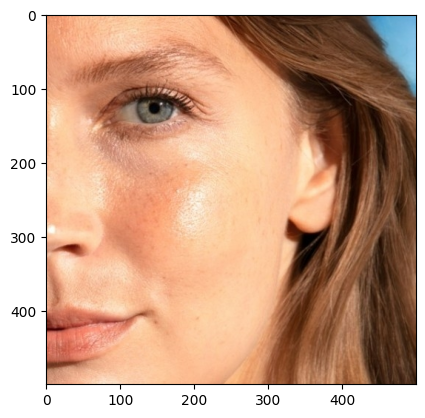

In [253]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [254]:
for image_class in os.listdir(data_dir)[0::2]:
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print("Image not found : {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

libpng warning: iCCP: known incorrect sRGB profile


In [255]:
import numpy as np
from matplotlib import pyplot as plt

In [256]:
data = tf.keras.utils.image_dataset_from_directory("data", batch_size=8, image_size=(256, 256))

Found 380 files belonging to 2 classes.


In [257]:
data_iterator = data.as_numpy_iterator()

2023-07-10 10:27:40.799416: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:27:40.800187: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [380]
	 [[{{node Placeholder/_0}}]]


In [258]:
data_iterator

In [259]:
batch = data_iterator.next()

In [260]:
batch[0].shape

(8, 256, 256, 3)

In [261]:
# 1 represents oily skin
# 0 represents dry skin
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

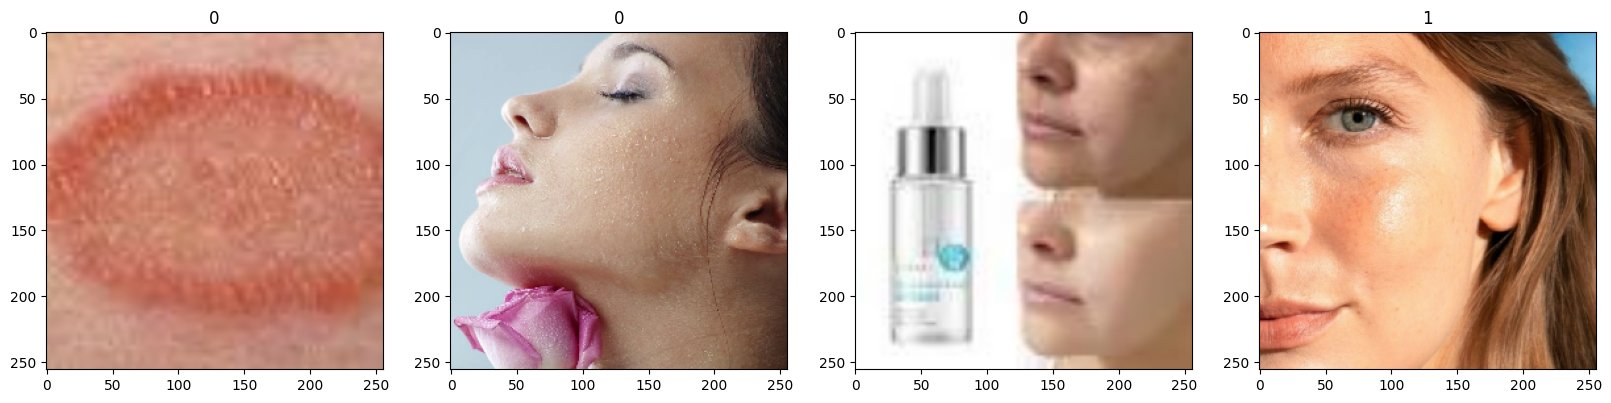

In [262]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [263]:
scaled = batch[0] / 255

In [264]:
scaled.max()

1.0

In [265]:
data = data.map(lambda x, y: (x/255, y))


In [266]:
scaled_iterator = data.as_numpy_iterator()

2023-07-10 10:27:41.869077: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:27:41.869293: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]


In [267]:
batch = scaled_iterator.next()

2023-07-10 10:27:42.364978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


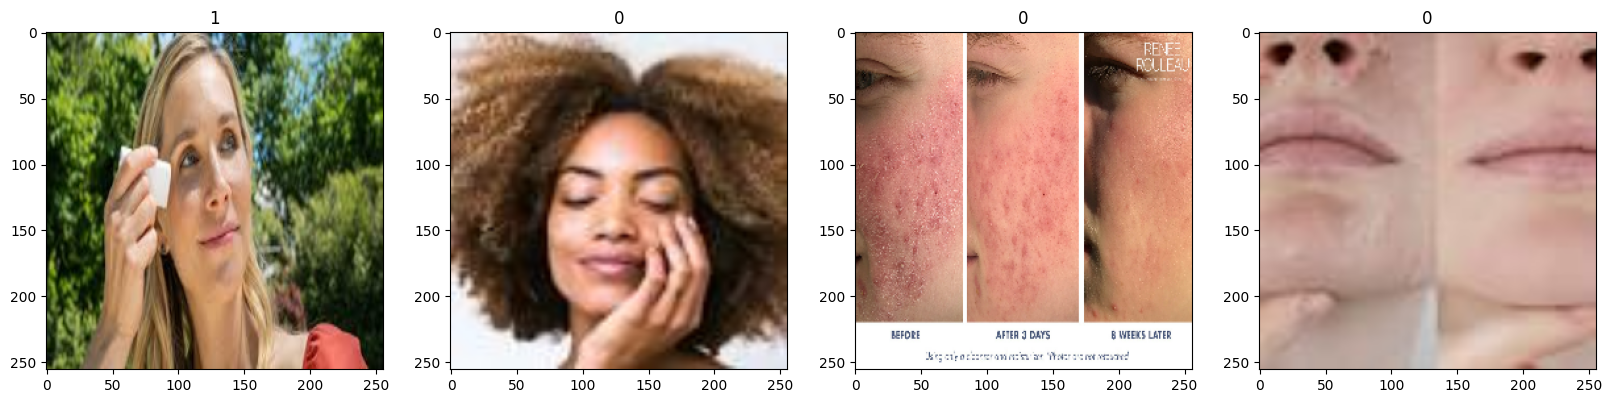

In [268]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [269]:
len(data)

48

In [270]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [271]:
print(train_size, val_size, test_size)


33 10 5


In [272]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [273]:
print(type(train))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [274]:
print(len(train))

33


In [275]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [276]:
model = Sequential()

In [277]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [278]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [279]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 64)       

In [280]:
logdir = 'logs'

In [281]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [282]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-07-10 10:27:43.941569: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:27:43.941755: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [380]
	 [[{{node Placeholder/_0}}]]
2023-07-10 10:27:44.146268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-10 10:27:44.626372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.5379

2023-07-10 10:27:46.585739: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:27:46.585956: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:27:46.623462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-10 10:27:47.052898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 4s 80ms/step - loss: 0.9781 - accuracy: 0.5379 - val_loss: 0.6690 - val_accuracy: 0.5875
Epoch 2/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.6727 - accuracy: 0.5250

2023-07-10 10:27:48.259365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/33 [============================>.] - ETA: 0s - loss: 0.6364 - accuracy: 0.6133

2023-07-10 10:27:50.024263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 80ms/step - loss: 0.6375 - accuracy: 0.6136 - val_loss: 0.6115 - val_accuracy: 0.7375
Epoch 3/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.5812 - accuracy: 0.8250

2023-07-10 10:27:51.249759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/33 [============================>.] - ETA: 0s - loss: 0.4888 - accuracy: 0.8047

2023-07-10 10:27:52.926419: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 77ms/step - loss: 0.4918 - accuracy: 0.7992 - val_loss: 0.5590 - val_accuracy: 0.7000
Epoch 4/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.4778 - accuracy: 0.7500

2023-07-10 10:27:54.145615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/33 [============================>.] - ETA: 0s - loss: 0.4216 - accuracy: 0.8281

2023-07-10 10:27:55.917566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 80ms/step - loss: 0.4251 - accuracy: 0.8182 - val_loss: 0.5101 - val_accuracy: 0.8000
Epoch 5/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.4140 - accuracy: 0.8750

2023-07-10 10:27:57.137531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.3797 - accuracy: 0.8674

2023-07-10 10:27:58.792332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.3797 - accuracy: 0.8674 - val_loss: 0.4692 - val_accuracy: 0.7000
Epoch 6/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.2006 - accuracy: 0.9750

2023-07-10 10:27:59.987172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.3337 - accuracy: 0.8788

2023-07-10 10:28:01.644369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.3337 - accuracy: 0.8788 - val_loss: 1.2170 - val_accuracy: 0.7875
Epoch 7/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.6251 - accuracy: 0.8000

2023-07-10 10:28:02.845445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.3698 - accuracy: 0.8636

2023-07-10 10:28:04.472164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.3698 - accuracy: 0.8636 - val_loss: 0.5627 - val_accuracy: 0.7500
Epoch 8/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.2911 - accuracy: 0.9000

2023-07-10 10:28:05.709006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9167

2023-07-10 10:28:07.362323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.2042 - accuracy: 0.9167 - val_loss: 0.3824 - val_accuracy: 0.8375
Epoch 9/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.1699 - accuracy: 0.9500

2023-07-10 10:28:08.559292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.1684 - accuracy: 0.9432

2023-07-10 10:28:10.192510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.1684 - accuracy: 0.9432 - val_loss: 0.8983 - val_accuracy: 0.7500
Epoch 10/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0994 - accuracy: 0.9500

2023-07-10 10:28:11.392911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 0.9318

2023-07-10 10:28:13.013045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.1704 - accuracy: 0.9318 - val_loss: 0.3976 - val_accuracy: 0.8875
Epoch 11/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0801 - accuracy: 1.0000

2023-07-10 10:28:14.205020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9697

2023-07-10 10:28:15.834997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.1002 - accuracy: 0.9697 - val_loss: 0.5181 - val_accuracy: 0.8625
Epoch 12/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0616 - accuracy: 0.9750

2023-07-10 10:28:17.037302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 0.9773

2023-07-10 10:28:18.656624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.1278 - accuracy: 0.9773 - val_loss: 0.4259 - val_accuracy: 0.8250
Epoch 13/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.1191 - accuracy: 0.9500

2023-07-10 10:28:19.857986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9621

2023-07-10 10:28:21.488183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.1205 - accuracy: 0.9621 - val_loss: 0.3731 - val_accuracy: 0.8625
Epoch 14/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0805 - accuracy: 0.9750

2023-07-10 10:28:22.675202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9848

2023-07-10 10:28:24.293367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0821 - accuracy: 0.9848 - val_loss: 0.4908 - val_accuracy: 0.8250
Epoch 15/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0400 - accuracy: 1.0000

2023-07-10 10:28:25.502043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9924

2023-07-10 10:28:27.130057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0345 - accuracy: 0.9924 - val_loss: 0.4918 - val_accuracy: 0.8875
Epoch 16/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0233 - accuracy: 0.9750

2023-07-10 10:28:28.314193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9924

2023-07-10 10:28:29.938663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0139 - accuracy: 0.9924 - val_loss: 0.5870 - val_accuracy: 0.8875
Epoch 17/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0072 - accuracy: 1.0000   

2023-07-10 10:28:31.133898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9811

2023-07-10 10:28:32.757259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0331 - accuracy: 0.9811 - val_loss: 0.6538 - val_accuracy: 0.8250
Epoch 18/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.0327 - accuracy: 1.0000

2023-07-10 10:28:33.939231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9811

2023-07-10 10:28:35.560047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0544 - accuracy: 0.9811 - val_loss: 0.7390 - val_accuracy: 0.8375
Epoch 19/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.1434 - accuracy: 0.9500

2023-07-10 10:28:36.752066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/33 [============================>.] - ETA: 0s - loss: 0.1260 - accuracy: 0.9609

2023-07-10 10:28:38.390987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 76ms/step - loss: 0.1274 - accuracy: 0.9583 - val_loss: 0.4825 - val_accuracy: 0.8250
Epoch 20/20
 5/33 [===>..........................] - ETA: 1s - loss: 0.1129 - accuracy: 0.9500

2023-07-10 10:28:39.588771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - ETA: 0s - loss: 0.0925 - accuracy: 0.9697

2023-07-10 10:28:41.213040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/33 [==============================] - 3s 75ms/step - loss: 0.0925 - accuracy: 0.9697 - val_loss: 0.7186 - val_accuracy: 0.7875


In [283]:
hist.history

{'loss': [0.9780558347702026,
  0.6374844312667847,
  0.491810142993927,
  0.42513227462768555,
  0.3797392249107361,
  0.3337445855140686,
  0.36982762813568115,
  0.2042378932237625,
  0.16843561828136444,
  0.17038385570049286,
  0.10022025555372238,
  0.1277976781129837,
  0.1204691156744957,
  0.08207319676876068,
  0.03451274335384369,
  0.013877187855541706,
  0.0330623984336853,
  0.05439874157309532,
  0.12735892832279205,
  0.092533640563488],
 'accuracy': [0.5378788113594055,
  0.6136363744735718,
  0.7992424368858337,
  0.8181818723678589,
  0.8674242496490479,
  0.8787878751754761,
  0.8636363744735718,
  0.9166666865348816,
  0.9431818723678589,
  0.9318181872367859,
  0.9696969985961914,
  0.9772727489471436,
  0.9621212482452393,
  0.9848484992980957,
  0.9924242496490479,
  0.9924242496490479,
  0.9810606241226196,
  0.9810606241226196,
  0.9583333730697632,
  0.9696969985961914],
 'val_loss': [0.6690317392349243,
  0.6115428805351257,
  0.5590035319328308,
  0.5100614

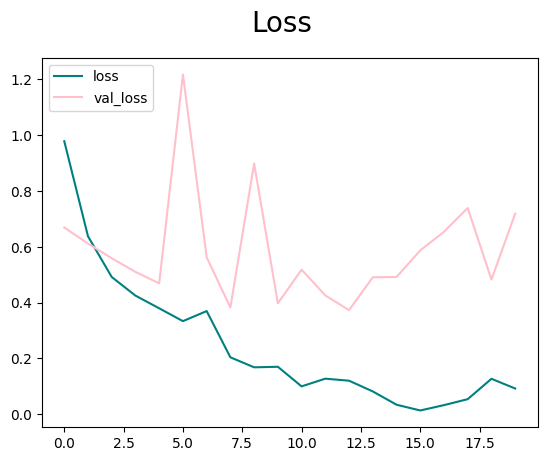

In [284]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'pink', label = "val_loss" )
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

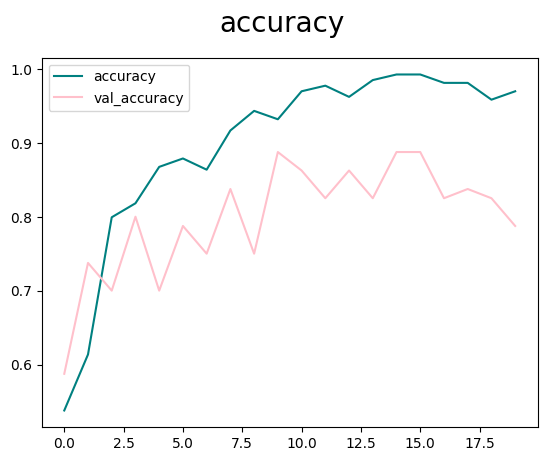

In [285]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'pink', label = "val_accuracy" )
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [286]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [287]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [288]:
len(test)

5

In [289]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    


2023-07-10 10:28:42.497787: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:28:42.497979: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [380]
	 [[{{node Placeholder/_4}}]]
2023-07-10 10:28:42.923723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 14ms/step


2023-07-10 10:28:43.711339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 36ms/step


In [290]:
print(f'Precision result: {pre.result().numpy()}, Recall result: {re.result().numpy()}, Accuracy result: {acc.result().numpy()}')

Precision result: 0.8399999737739563, Recall result: 0.9130434989929199, Accuracy result: 0.8333333134651184


In [291]:
import cv2

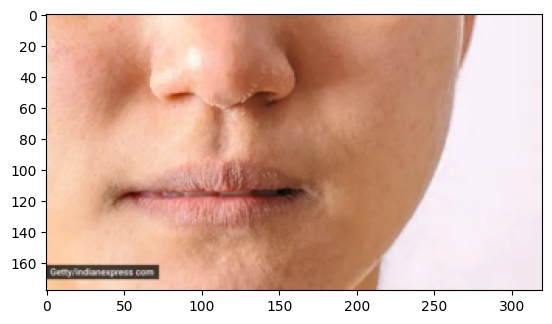

In [292]:
img = cv2.imread("drytest.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

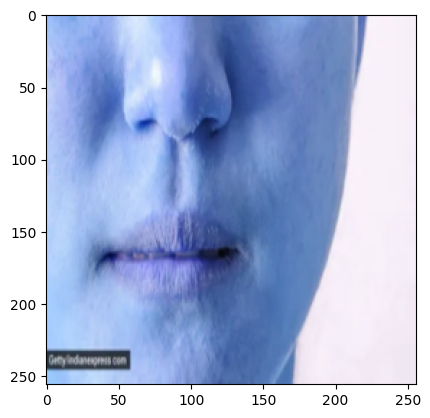

In [294]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [297]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [295]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 472ms/step


In [303]:
# 1 represents oily skin
# 0 represents dry skin
def result_print(value):
    if yhat > 0.5:
        print("oily")
    else:
        print("dry")

In [299]:
from keras.models import load_model

In [300]:
model.save(os.path.join('models', 'oilydrymodel.h5'))


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [301]:
new_model = load_model(os.path.join('models', 'oilydrymodel.h5'))

In [304]:
val = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [308]:
print(val[0][0])

0.28714782


In [309]:
result_print(val[0][0])

dry
